<a href="https://colab.research.google.com/github/matteo-orsi/MachineLearning/blob/main/challenges/challenge-00/challenge-00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [220]:
FFILE = './50_Startups.csv'
if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl -o "50_Startups.csv" "https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/refs/heads/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl -o "50_Startups.csv" "https://raw.githubusercontent.com/alexdepremia/ML_IADA_UTs/refs/heads/main/challenge_0/50_Startups.csv"

File already exists
File is readable


In [221]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv('50_Startups.csv')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [222]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [223]:
df.shape

(50, 5)

In [224]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [225]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [226]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [227]:
df_sel.dtypes # type of each column

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [228]:
df_one = pd.get_dummies(df_sel["State"], dtype=int)

In [229]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [230]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [231]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [232]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [233]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [234]:
df_fin.shape

(33, 5)

***Classification***

Prepare the dataset:

In [235]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features
# extract actual values from series
y = y.values
X = X.values

Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [236]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Train the Logistic Regression Model

In [237]:
from sklearn.linear_model import LogisticRegression

In [238]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.
LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)

***Plot results***

In [239]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

(TN) True Negatives: 3, (FP) False Positives: 0, (FN) False Negatives: 6, (TP) True Positives: 0


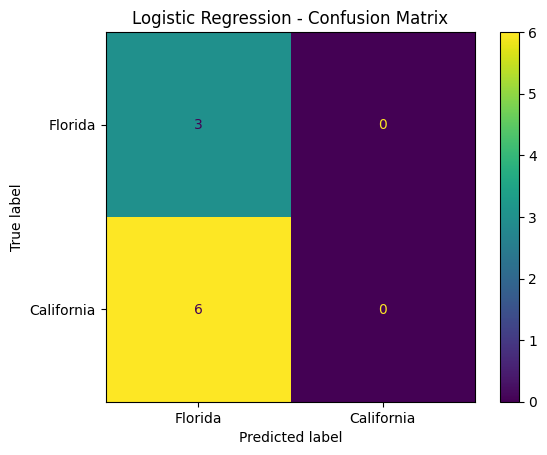

In [240]:
# Creating a confusion matrix to visualize the performance of the Logistic Regression model:
# • the rows (y-axis) represent the true labels, that are the actual classes the outcomes should have been;
# • the columns (x-axis) represent the predicted labels, that are the classes predicted by the model.
LR_cm = confusion_matrix(y_test, predictions)
LR_cm_display = ConfusionMatrixDisplay(confusion_matrix = LR_cm, display_labels = ["Florida", "California"])

# Getting the confusion matrix components in the correct order.
# According to the previous operations on the final dataset, the assignments are
# (negative = Florida = 0) and (positive = California = 1).
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print("(TN) True Negatives: %d, (FP) False Positives: %d, (FN) False Negatives: %d, (TP) True Positives: %d" % (tn, fp, fn, tp))

# Plotting the confusion matrix
LR_cm_display.plot()
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

In [241]:
import numpy.linalg as LA
from numpy.linalg import inv

In [242]:
def sigmoidM(X, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    return 1 / (1 + np.exp(-np.matmul(X, w)))

def LogisticLoss(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    return - np.mean(labels * np.log(sigmoidM(X, w)) + (1 - labels) * np.log(1 - sigmoidM(X, w)))

def LogisticGradient(X, labels, w):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    return (1 / np.shape(X)[0]) * np.matmul(np.transpose(X), (sigmoidM(X, w) - labels))

def GDLogistic(X, labels, iter, gamma):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    # Variables to store the shape of X, that is a tuple (n, d)
    n, d = X.shape
    # Array to store loss values at each iteration
    L = np.zeros(iter)
    # Initialize w with random values
    w = np.random.uniform(0, 0.01, d)
    # Array to store weights at each iteration
    W = np.zeros((d, iter))

    for i in range(iter):
        # Store the current weight vector in the W array
        W[:, i] = w
        # Update the weight vector using Gradient Descent
        # The update rule is based on the Logistic Gradient (i.e., Gradient of the Logistic Loss)
        w = w - gamma * LogisticGradient(X, labels, w)
        # Compute and store the Logistic Loss for the current weight vector
        L[i] = LogisticLoss(X, labels, w)

    return W, L

In [243]:
def RidgeLogisticLoss(X, labels, w, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lam : float
        Weight of the L2 penalty term
    """
    return LogisticLoss(X, labels, w) + lam * (LA.norm(w, 2) ** 2)

def RidgeGradient(w, lam):
    """
    Parameters
    ----------
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lam : float
        Weight of the L2 penalty term
    """
    return 2 * lam * w

def GDRidgeLogistic(X, labels, iter, gamma, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L2 penalty term
    """
    # Variables to store the shape of X, that is a tuple (n, d)
    n, d = X.shape
    # Array to store loss values at each iteration
    L = np.zeros(iter)
    # Initialize w with random values
    w = np.random.uniform(0, 0.01, d)
    # Array to store weights at each iteration
    W = np.zeros((d, iter))

    for i in range(iter):
        # Store the current weights in the W array
        W[:, i] = w
        # Update the weight vector using Gradient Descent
        # The update rule is based on the Ridge Logistic Gradient
        # (i.e., Gradient of the Logistic Loss with Ridge regularization)
        w = w - gamma * (LogisticGradient(X, labels, w) + RidgeGradient(w, lam))
        # Compute and store the Logistic Loss with Ridge regularization for the current weight vector
        L[i] = RidgeLogisticLoss(X, labels, w, lam)

    return W, L

In [244]:
def LassoLogisticLoss(X, labels, w, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lam : float
        Weight of the L1 penalty term
    """
    return LogisticLoss(X, labels, w) + lam * LA.norm(w, 1)

def LassoGradient(w, lam):
    """
    Parameters
    ----------
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lam : float
        Weight of the L1 penalty term
    """
    return lam * np.sign(w)

def GDLassoLogistic(X, labels, iter, gamma, lam):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    lam : float
        Weight of the L1 penalty term
    """
    # Variables to store the shape of X, that is a tuple (n, d)
    n, d = X.shape
    # Array to store loss values at each iteration
    L = np.zeros(iter)
    # Initialize w with random values
    w = np.random.uniform(0, 0.01, d)
    # Array to store weights at each iteration
    W = np.zeros((d, iter))

    for i in range(iter):
        # Store the current weights in the W array
        W[:, i] = w
        # Update the weight vector using Gradient Descent
        # The update rule is based on the Lasso Logistic Gradient
        # (i.e., Gradient of the Logistic Loss with Lasso regularization)
        w = w - gamma * (LogisticGradient(X, labels, w) + LassoGradient(w, lam))
        # Compute and store the Logistic Loss with Lasso regularization for the current weight vector
        L[i] = LassoLogisticLoss(X, labels, w, lam)

    return W, L

In [245]:
def ElasticNetLogisticLoss(X, labels, w, lr, l):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization)
    l : float
        Regularization strength parameter
    """
    return LogisticLoss(X, labels, w) + lr * l * LA.norm(w, 1) + (1 - lr) * l * (LA.norm(w, 2) ** 2)

def ElasticNetGradient(X, labels, w, lr, l):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization)
    l : float
        Regularization strength parameter
    """
    return LogisticGradient(X, labels, w) + lr * LassoGradient(w, l) + (1 - lr) * RidgeGradient(w, l)

def GDElasticNetLogistic(X, labels, lr, l, iter, gamma):
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    labels : array of dim n
        Vector representing the ground truth label of each data point
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization)
    l : float
        Regularization strength parameter
    iter : int
        Number of GD iterations
    gamma : float
        Learning rate
    """
    # Variables to store the shape of X, that is a tuple (n, d)
    n, d = X.shape
    # Array to store loss values at each iteration
    L = np.zeros(iter)
    # Initialize w with random values
    w = np.random.uniform(0, 0.01, d)
    # Array to store weights at each iteration
    W = np.zeros((d, iter))

    for i in range(iter):
        # Store the current weights in the W array
        W[:, i] = w
        # Update the weight vector using Gradient Descent
        # The update rule is based on the Elastic Net Logistic Gradient
        # (i.e., Gradient of the Logistic Loss with Elastic Net regularization)
        w = w - gamma * ElasticNetGradient(X, labels, w, lr, l)
        # Compute and store the Logistic Loss with Elastic Net regularization for the current weight vector
        L[i] = ElasticNetLogisticLoss(X, labels, w, lr, l)

    return W, L

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [246]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)
target_names = ['California', 'Florida']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Repeat the previous task for regularized logistic regression and compare the results.

In [247]:
# Setting the parameters manually
iter = 1000
gamma = 0.001
lam = 0.001
lr = 0.5

In [248]:
# Model assessment: Logistic Regression (without normalization)
W_logistic, L_logistic = GDLogistic(X_train, y_train, iter, gamma)
y_pred_logistic = (sigmoidM(X_test, W_logistic[:, -1]) >= 0.5).astype(int)
print(classification_report(y_true, y_pred_logistic, target_names = target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [249]:
# Model assessment: Ridge Logistic Regression
W_ridge, L_ridge = GDRidgeLogistic(X_train, y_train, iter, gamma, lam)
y_pred_ridge = (sigmoidM(X_test, W_ridge[:, -1]) >= 0.5).astype(int)
print(classification_report(y_true, y_pred_ridge, target_names = target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [250]:
# Model assessment: Lasso Logistic Regression
W_lasso, L_lasso = GDLassoLogistic(X_train, y_train, iter, gamma, lam)
y_pred_lasso = (sigmoidM(X_test, W_lasso[:, -1]) >= 0.5).astype(int)
print(classification_report(y_true, y_pred_lasso, target_names = target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [251]:
# Model assessment: Elastic Net Logistic Regression
W_en, L_en = GDElasticNetLogistic(X_train, y_train, lr, lam, iter, gamma)
y_pred_en = (sigmoidM(X_test, W_en[:, -1]) >= 0.5).astype(int)
print(classification_report(y_true, y_pred_en, target_names = target_names))

              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [252]:
from sklearn.metrics import roc_curve, roc_auc_score

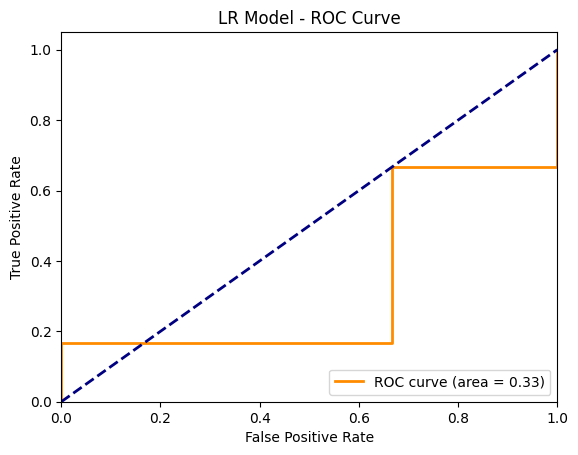

In [253]:
# ROC Curve - LR Model
y_prob = LR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = roc_auc_score(y_true, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Model - ROC Curve')
plt.legend(loc="lower right")
plt.show()

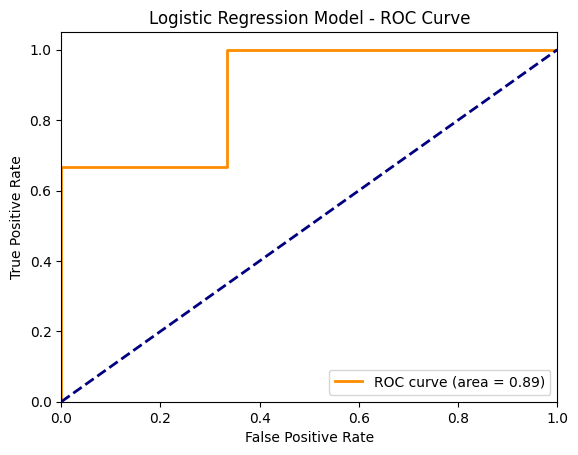

In [254]:
# ROC Curve - Logistic Regression Model (without regularization)
y_prob_logistic = sigmoidM(X_test, W_logistic[:, -1])
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_true, y_prob_logistic)
roc_auc_logistic = roc_auc_score(y_true, y_prob_logistic)

plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Model - ROC Curve')
plt.legend(loc="lower right")
plt.show()

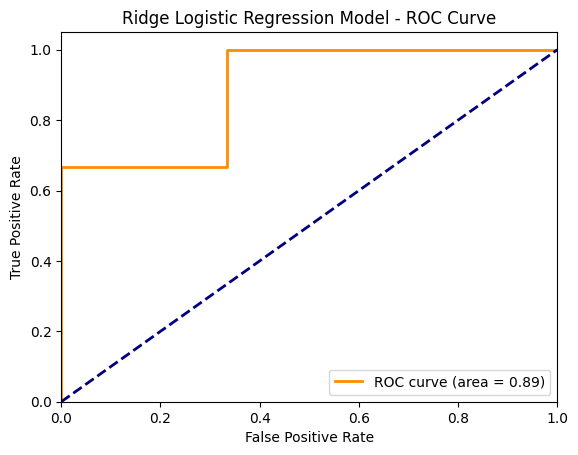

In [255]:
# ROC Curve - Ridge Logistic Regression Model
y_prob_ridge = sigmoidM(X_test, W_ridge[:, -1])
fpr_ridge, tpr_ridge, thresholds_ridge = roc_curve(y_true, y_prob_ridge)
roc_auc_ridge = roc_auc_score(y_true, y_prob_ridge)

plt.figure()
plt.plot(fpr_ridge, tpr_ridge, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ridge)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ridge Logistic Regression Model - ROC Curve')
plt.legend(loc="lower right")
plt.show()

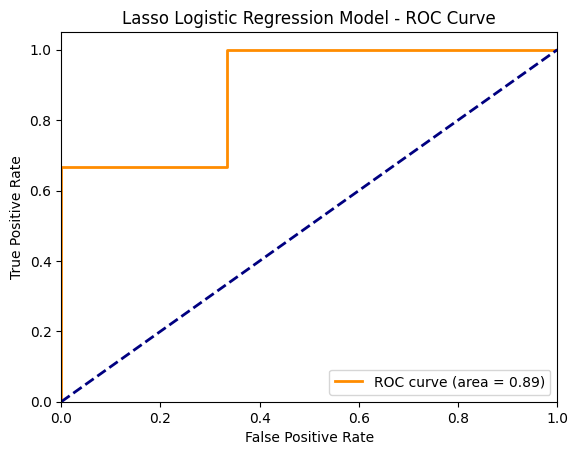

In [256]:
# ROC Curve - Lasso Logistic Regression Model
y_prob_lasso = sigmoidM(X_test, W_lasso[:, -1])
fpr_lasso, tpr_lasso, thresholds_lasso = roc_curve(y_true, y_prob_lasso)
roc_auc_lasso = roc_auc_score(y_true, y_prob_lasso)

plt.figure()
plt.plot(fpr_lasso, tpr_lasso, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_lasso)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Lasso Logistic Regression Model - ROC Curve')
plt.legend(loc="lower right")
plt.show()

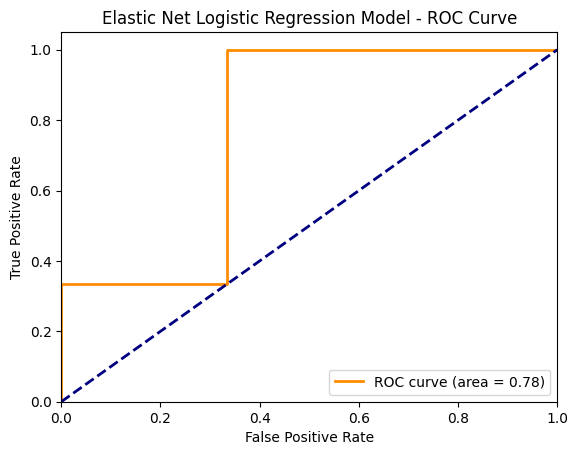

In [257]:
# ROC Curve - Elastic Net Logistic Regression Model
y_prob_en = sigmoidM(X_test, W_en[:, -1])
fpr_en, tpr_en, thresholds_en = roc_curve(y_true, y_prob_en)
roc_auc_en = roc_auc_score(y_true, y_prob_en)

plt.figure()
plt.plot(fpr_en, tpr_en, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_en)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Elastic Net Logistic Regression Model - ROC Curve')
plt.legend(loc="lower right")
plt.show()